My CNN modell and training

c:\Users\natib\OneDrive\Documents\Abschlussprojekt-cnn-digit-recognition\venv_py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,186 (1.66 MB)

 Trainable params: 434,186 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6394 - loss: 1.0543 - val_accuracy: 0.9780 - val_loss: 0.0856
Epoch 2/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9616 - loss: 0.1572 - val_accuracy: 0.9836 - val_loss: 0.0666
Epoch 3/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9747 - loss: 0.0967 - val_accuracy: 0.9852 - val_loss: 0.0712
Epoch 4/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9826 - loss: 0.0765 - val_accuracy: 0.9909 - val_loss: 0.0404
Epoch 5/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9856 - loss: 0.0580 - val_accuracy: 0.9902 - val_loss: 0.0502
Epoch 6/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9850 - loss: 0.0640 - val_accuracy: 0.9873 - val_loss: 0.0542
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0567
Test accuracy: 0.9885


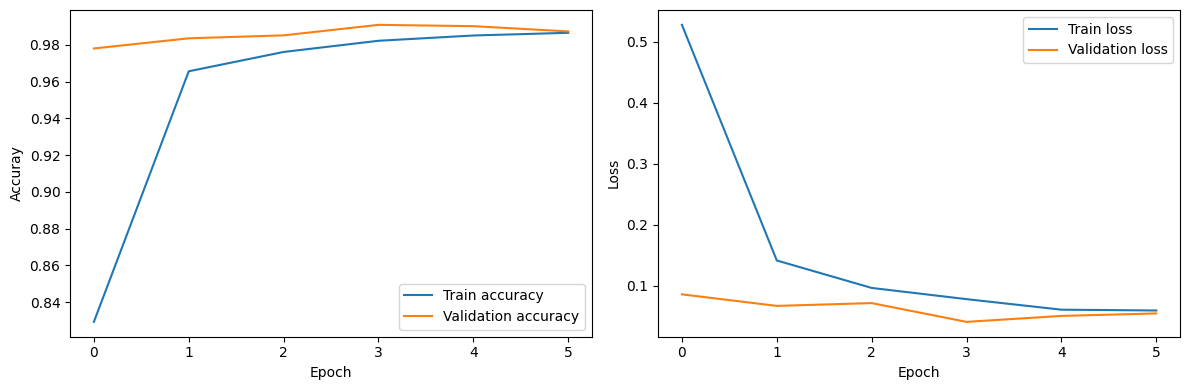

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from functools import partial

# 1. Preaper datas
# Load MNIST 
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Split train and test datas (80% train data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation 0-1 number (better to the meory usage)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for the CNN -1 auto batch size, 28x28 pixel, 1 cahannel greyscale image if colored 3(RGB)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#label to int
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Validate data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 2. Modell 

#default conv2D
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", 
                        activation="relu", kernel_initializer="he_normal") #kernel size 3x3, with padding, relu

model = tf.keras.Sequential([
    
    # 2D convolutional layers
    
    #1.
    DefaultConv2D(filters=32,kernel_size=5,input_shape=[28,28,1]), # input 2D convolutional layer number of maps 32 and start with 5x5 kernel
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    #2.
    DefaultConv2D(filters=64),                                     #2D convolutional layer number of maps 64
    DefaultConv2D(filters=64),                                     #2D convolutional layer number of maps 64
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    #3.
    DefaultConv2D(filters=128),                                    #2D convolutional layer number of maps 128
    DefaultConv2D(filters=128),                                    #2D convolutional layer number of maps 128
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    
    #fully connected layers
    tf.keras.layers.Flatten(),                                     # make a 1D vector to fully connected layers
    # 1.
    tf.keras.layers.Dense(units=128, activation="relu", 
                          kernel_initializer="he_normal"),         # relu 1 (positiv) or 0 (negativ) fully connected layer (hidden layer) 128 neuron
    tf.keras.layers.Dropout(0.5),                                  # dropout layers 50% (reduce overfitting, random shutdown neurons)
    # 2.
    tf.keras.layers.Dense(units=64, activation="relu",             
                          kernel_initializer="he_normal"),         # relu fully connected layer (hidden layer) 64 neuron
    tf.keras.layers.Dropout(0.5),                                  # dropout layers 50% (reduce overfitting)
    # 3. lastlayer
    tf.keras.layers.Dense(units=10,activation="softmax")           # output neurons 10(numbers 0-9) with softmax (maximum number)
])

# 3. Training and evaluation 
# Modell compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] #correct classification rate
)

# Show the modell structure
model.summary()

# Modell training 
history = model.fit(
    X_train, y_train,
    # X_train, y_train, #train data (x) and label (y)
    epochs=6,        #6 treaning cycles. How many times to go through all the teaching data
    batch_size=64,    #how many images are processed at a time
    validation_data=(X_val, y_val), #after each epoch, the model is also evaluated against the validation data
    verbose=1         # Shows the progress of teaching (1 = detailed display)
)

# Shows the accuracy of the model on data that has not yet been seen
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Grafikons
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuray')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# save weights
model.save_weights('number_recognition_2.weights.h5')

# modell.save
model.save('number_recognition_model_2.h5')

c:\Users\natib\OneDrive\Documents\Abschlussprojekt-cnn-digit-recognition\venv_py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 28, 28, 32)     │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 7, 7, 180)      │       103,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 7, 7, 180)      │       291,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 3, 3, 180)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1620)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 180)            │       291,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │        11,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 756,262 (2.88 MB)

 Trainable params: 756,262 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.5930 - loss: 1.1796 - val_accuracy: 0.9787 - val_loss: 0.0771
Epoch 2/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9639 - loss: 0.1469 - val_accuracy: 0.9843 - val_loss: 0.0626
Epoch 3/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9769 - loss: 0.0916 - val_accuracy: 0.9873 - val_loss: 0.0560
Epoch 4/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9830 - loss: 0.0701 - val_accuracy: 0.9882 - val_loss: 0.0485
Epoch 5/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9866 - loss: 0.0570 - val_accuracy: 0.9877 - val_loss: 0.0519
Epoch 6/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9884 - loss: 0.0458 - val_accuracy: 0.9911 - val_loss: 0.0453
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9900 - loss: 0.0435
Test accuracy: 0.9906


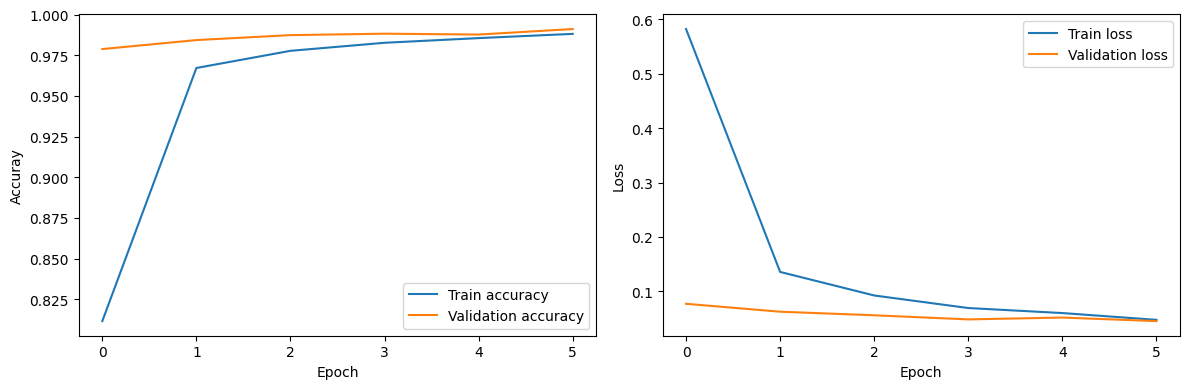

In [28]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from functools import partial

# 1. Preaper datas
# Load MNIST 
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Split train and test datas (80% train data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation 0-1 number (better to the meory usage)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for the CNN -1 auto batch size, 28x28 pixel, 1 cahannel greyscale image if colored 3(RGB)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)



y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Validate data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 2. Modell 

#default conv2D
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", 
                        activation="relu", kernel_initializer="he_normal") #kernel size 3x3, with padding, relu

model = tf.keras.Sequential([
    
    # 2D convolutional layers
    
    #1.
    DefaultConv2D(filters=32,kernel_size=6,input_shape=[28,28,1]), # input 2D convolutional layer number of maps 32 and start with 5x5 kernel
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    #2.
    DefaultConv2D(filters=64),                                     #2D convolutional layer number of maps 64
    DefaultConv2D(filters=64),                                     #2D convolutional layer number of maps 64
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    #3.
    DefaultConv2D(filters=180),                                    #2D convolutional layer number of maps 128
    DefaultConv2D(filters=180),                                    #2D convolutional layer number of maps 128
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    
    #fully connected layers
    tf.keras.layers.Flatten(),                                     # make a 1D vector to fully connected layers
    # 1.
    tf.keras.layers.Dense(units=180, activation="relu", 
                          kernel_initializer="he_normal"),         # relu 1 (positiv) or 0 (negativ) fully connected layer (hidden layer) 128 neuron
    tf.keras.layers.Dropout(0.5),                                  # dropout layers 50% (reduce overfitting, random shutdown neurons)
    # 2.
    tf.keras.layers.Dense(units=64, activation="relu",             
                          kernel_initializer="he_normal"),         # relu fully connected layer (hidden layer) 64 neuron
    tf.keras.layers.Dropout(0.5),                                  # dropout layers 50% (reduce overfitting)
    #tf.keras.layers.Dense(units=32, activation="relu", 
    #                      kernel_initializer="he_normal"),         # relu 1 (positiv) or 0 (negativ) fully connected layer (hidden layer) 128 neuron
    #tf.keras.layers.Dropout(0.5),
    # 3. lastlayer
    tf.keras.layers.Dense(units=10,activation="softmax")           # output neurons 10(numbers 0-9) with softmax (maximum number)
])

# Salt-and-Pepper noise
def add_salt_and_pepper_noise(images, prob=0.05):
    noisy_images = images.copy()
    for i in range(images.shape[0]):
        mask = np.random.choice([0, 1, 2], size=images[i].shape, p=[prob / 2, prob / 2, 1 - prob])
        noisy_images[i][mask == 0] = 0.0  # Slat black pixel
        noisy_images[i][mask == 1] = 1.0  # Pepper - white pixel
    return noisy_images

def add_gaussian_noise(images, mean=0, stddev=0.1):
    noise = np.random.normal(mean, stddev, images.shape)
    noisy_images = images + noise
    # Érték tartomány korlátozása 0 és 1 közé
    return np.clip(noisy_images, 0, 1)

x_train_noisy = add_gaussian_noise(X_train)
X_val_noisy = add_gaussian_noise(X_val)


# generate noisy dates 
noisy_X_train = add_salt_and_pepper_noise(X_train)
noisy_X_val = add_salt_and_pepper_noise(X_val)

# 3. Training and evaluation 
# Modell compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] #correct classification rate
)

# Show the modell structure
model.summary()

# Modell training 
history = model.fit(
    # x_train_noisy, y_train, #gauss
    noisy_X_train, y_train,   #salz
    # X_train, y_train, #train data (x) and label (y)
    epochs=6,        #6 treaning cycles. How many times to go through all the teaching data
    batch_size=64,    #how many images are processed at a time
    validation_data=(X_val, y_val), #after each epoch, the model is also evaluated against the validation data
    verbose=1         # Shows the progress of teaching (1 = detailed display)
)

# Shows the accuracy of the model on data that has not yet been seen
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Grafikons
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuray')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Save the modell

In [29]:
# save weights
model.save_weights('number_recognition_noisy_5.weights.h5')

# modell.save
model.save('number_recognition_model_noisy_5.h5')

Load a modell

In [40]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
from tensorflow.keras.utils import to_categorical

# 1. Prepare data
# Load MNIST 
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Convert labels from string to int
y = y.astype(np.int32)

# Split train and test data (80% train data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization 0-1 number (better for memory usage)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for CNN: -1 auto batch size, 28x28 pixel, 1 channel grayscale image
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Load the model
model = load_model('number_recognition_model_2.h5')

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# Make predictions
predictions = model.predict(X_test)
print(predictions.shape)  # Should be (n_samples, 10) where 10 is the number of classes

438/438 - 1s - 3ms/step - accuracy: 0.9885 - loss: 0.0555
Restored model, accuracy: 98.85%
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(14000, 10)


438/438 - 1s - 3ms/step - accuracy: 0.9900 - loss: 0.0407
Restored model, accuracy: 99.00%
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(14000, 10)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


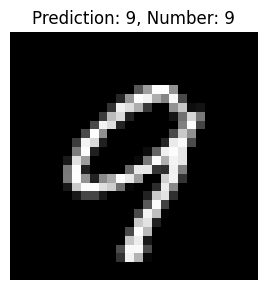

Perdiction: 9
Number: 9
[1.5246312e-16 6.2748300e-18 1.0023603e-15 2.2370410e-13 1.6944037e-18
 7.2454521e-14 4.0383278e-14 1.3484721e-17 1.0000000e+00 2.3740684e-15]
9


In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Prepare data
# Load MNIST 
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Convert labels from string to int
y = y.astype(np.int32)

# Split train and test data (80% train data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization 0-1 number (better for memory usage)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for CNN: -1 auto batch size, 28x28 pixel, 1 channel grayscale image
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Load the model
model = load_model('number_recognition_model_noisy_2.h5')

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# Make predictions on X_test (not y_test!)
predictions = model.predict(X_test)
print(predictions.shape)  # Should be (n_samples, 10) where 10 is the number of classes

# Chose random index(number)
random_index = random.randint(0, len(X_test) - 1)

# real image and label
random_image = X_test[random_index]
true_label = y_test[random_index]

# Reahape
image_for_prediction = random_image.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(image_for_prediction)
predicted_label = np.argmax(prediction)



# Show
plt.figure(figsize=(6, 3))
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f'Prediction: {predicted_label}, Number: {true_label}')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Perdiction: {predicted_label}")
print(f"Number: {true_label}")


print(predictions[0]) #prediction number
print(np.argmax(prediction)) #last layer values



Test with normal data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


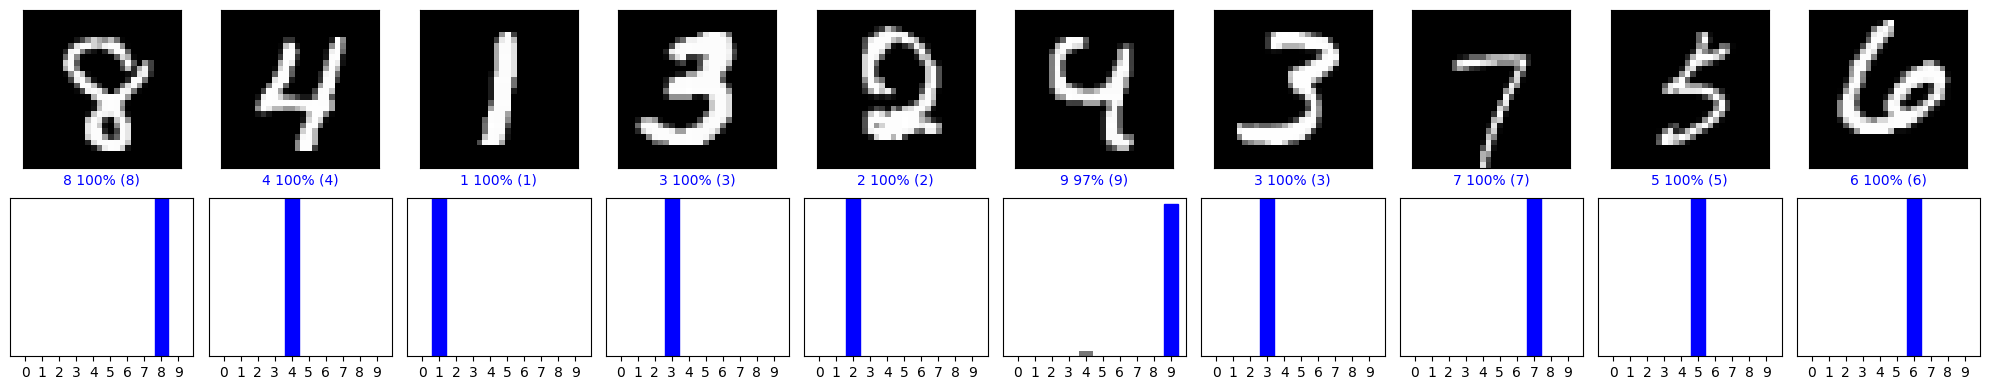

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# 1. Load data and prepare
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# 2. load modell
model = load_model('number_recognition_model_2.h5')

# 3. Class names (numbers)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# 4. Show image
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

# 5. procent
def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    


# 6. Random picture and predict
num_images = 10  
random_indices = random.sample(range(len(X_test)), num_images)

plt.figure(figsize=(2*num_images, 4))

for i, idx in enumerate(random_indices):
    image = X_test[idx]
    true_label = y_test[idx]
    
    # Predict
    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    
    plt.subplot(2, num_images, i+1)
    plot_image(prediction, true_label, image)
    
    plt.subplot(2, num_images, i+1+num_images)
    plot_value_array(prediction, true_label)

plt.tight_layout()
plt.show()

Test with noisy data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


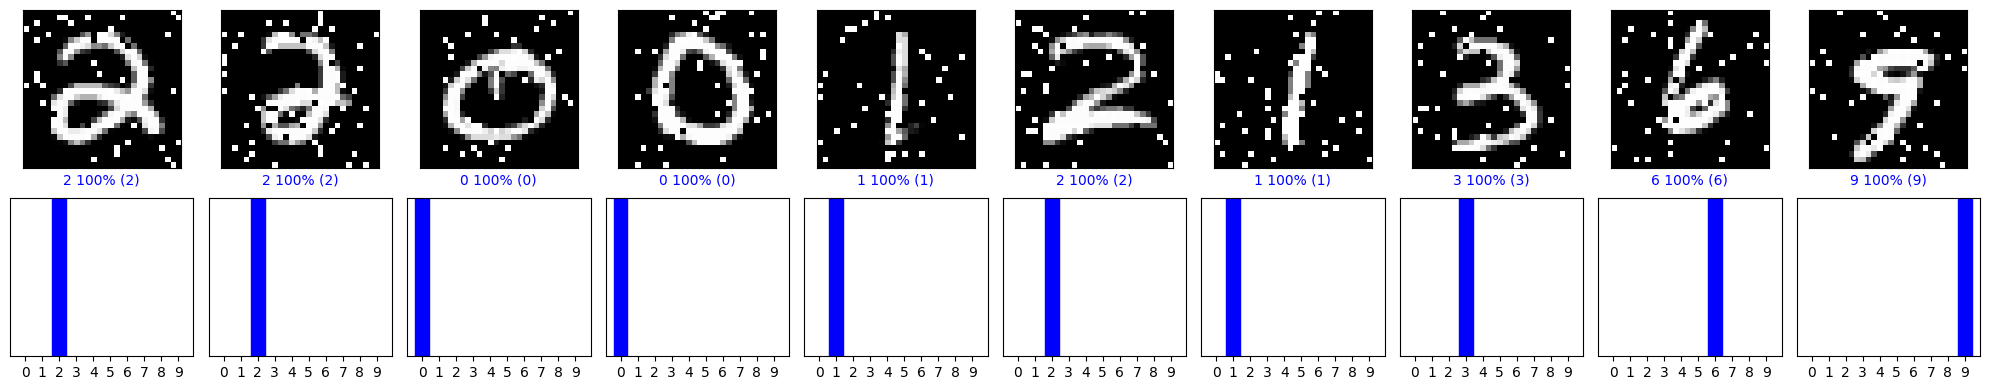

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# 1. Load data
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# 2. Load modell
model = load_model('number_recognition_model_noisy_2.h5')

# 3. Class names 
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# 4.Show image
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

# 5. Procent
def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
    # Generate noisy data
def add_salt_and_pepper_noise(images, prob=0.1):  # plus noise to test
    noisy_images = images.copy()
    for i in range(images.shape[0]):
        mask = np.random.choice([0, 1, 2], size=images[i].shape, p=[prob / 2, prob / 2, 1 - prob])
        noisy_images[i][mask == 0] = 0.0  # Salt - balck pixel
        noisy_images[i][mask == 1] = 1.0  # Pepper - white pixel
    return noisy_images

# Make a noisy dataset
noisy_X_test = add_salt_and_pepper_noise(X_test)

# 6. Random picture and predict
num_images = 10  
random_indices = random.sample(range(len(noisy_X_test)), num_images)

plt.figure(figsize=(2*num_images, 4))

for i, idx in enumerate(random_indices):
    image = noisy_X_test[idx]
    true_label = y_test[idx]
    
    # Predict
    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    
    plt.subplot(2, num_images, i+1)
    plot_image(prediction, true_label, image)
    
    plt.subplot(2, num_images, i+1+num_images)
    plot_value_array(prediction, true_label)

plt.tight_layout()
plt.show()

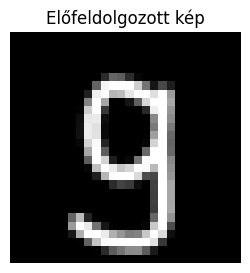

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predikció: 9, Bizonyosság: 100.00%


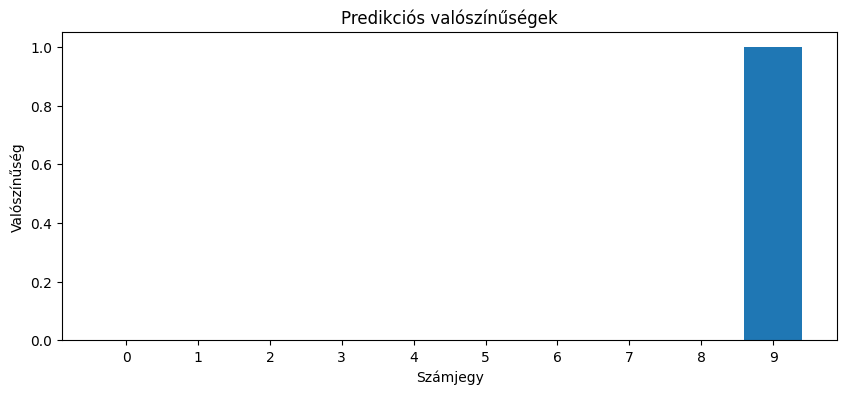

(np.int64(9),
 array([2.0147226e-09, 2.0558411e-11, 7.5049411e-10, 9.7879490e-07,
        2.4931231e-05, 6.7655554e-07, 3.3368128e-11, 1.3937647e-07,
        1.0982313e-06, 9.9997222e-01], dtype=float32))

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load modell
model = load_model('number_recognition_model_noisy_5.h5')

def preprocess_image(image_path):
    # Load image with PiL 
    img = Image.open(image_path).convert('L')  # greyscale
    
    # Resize 28*28
    img = img.resize((28, 28))
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Invert to black number - white background => white number, black background
    img_array = 255 - img_array
    
    # Normalisation
    img_array = img_array / 255.0
    
    # Show this picture
    plt.figure(figsize=(3, 3))
    plt.imshow(img_array, cmap='gray')
    plt.title("Előfeldolgozott kép")
    plt.axis('off')
    plt.show()
    
    # reshape to modell
    return img_array.reshape(1, 28, 28, 1)

def predict_digit(image_path):
    # Kép előfeldolgozása
    img = preprocess_image(image_path)
    
    # predict
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction[0])
    confidence = np.max(prediction[0]) * 100
    
    print(f"Predikció: {predicted_digit}, Bizonyosság: {confidence:.2f}%")
    
    # Valószínűségek megjelenítése
    plt.figure(figsize=(10, 4))
    plt.bar(range(10), prediction[0])
    plt.xticks(range(10))
    plt.xlabel('Számjegy')
    plt.ylabel('Valószínűség')
    plt.title('Predikciós valószínűségek')
    plt.show()
    
    return predicted_digit, prediction[0]

# Használat:
# predict_digit('sajat_szam.png')

#predict_digit('1.png')
#predict_digit('2.png')
#predict_digit('3.png')
#predict_digit('4.png')
#predict_digit('5.png')
#predict_digit('6.png')
#predict_digit('7.png')
#predict_digit('8.png')
predict_digit('9_3.png')
